In [ ]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
# 1. Cargar el dataset
data = pd.read_csv("airbnb_limpio.csv")

print("Dimensiones originales:", data.shape)

Dimensiones originales: (4560, 51)


In [17]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentile25 = y.quantile(0.25)  #Q1
percentile75 = y.quantile(0.75)  #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
data3_iqr = cuantitativas[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data3_iqr

#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 1))
data4_iqr

# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

# Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = Datos_limpios.isnull().sum()
valores_nulos


Limite superior permitido Unnamed: 0                   6.838500e+03
host_id                      7.942511e+08
latitude                     4.240358e+01
longitude                   -7.100181e+01
host_listings_count          1.945000e+02
host_total_listings_count    3.240000e+02
accommodates                 7.000000e+00
beds                         3.500000e+00
bedrooms                     3.500000e+00
price                        4.715000e+02
minimum_nights               7.600000e+01
maximum_nights               2.265000e+03
minimum_minimum_nights       7.350000e+01
maximum_minimum_nights       7.050000e+01
minimum_maximum_nights       2.265000e+03
maximum_maximum_nights       2.265000e+03
minimum_nights_avg_ntm       7.200000e+01
maximum_nights_avg_ntm       2.265000e+03
availability_30              5.250000e+01
availability_60              1.170000e+02
availability_90              1.695000e+02
availability_365             6.511250e+02
availability_eoy             3.640000e+02
number_o

,0
id,0
neighbourhood_cleansed,0
host_since,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_has_profile_pic,0
host_identity_verified,0
property_type,0


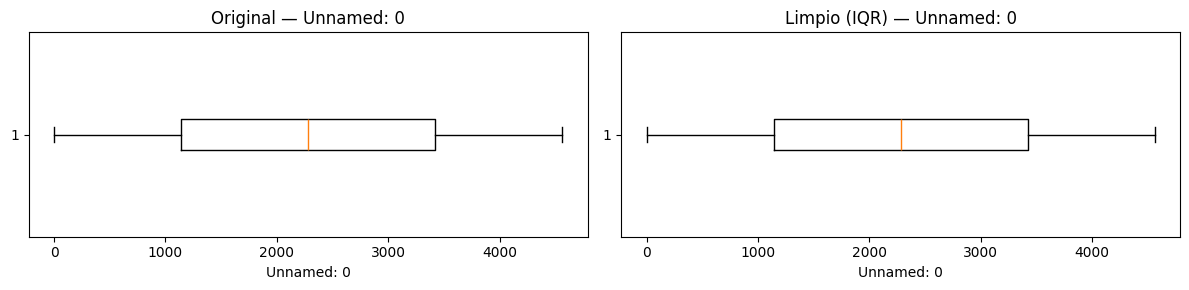

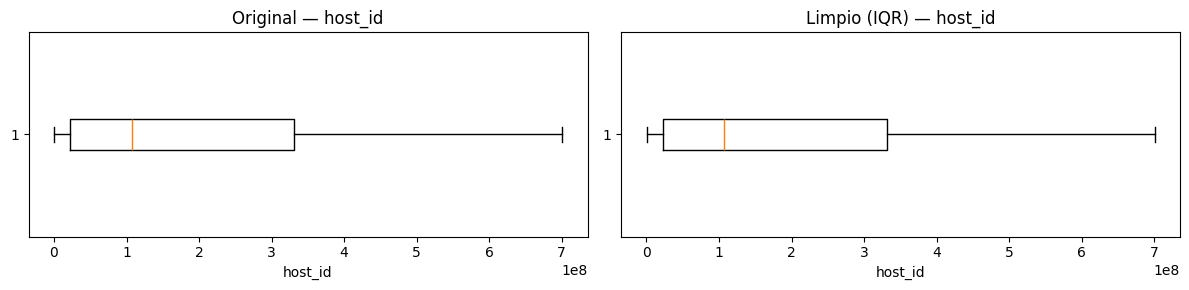

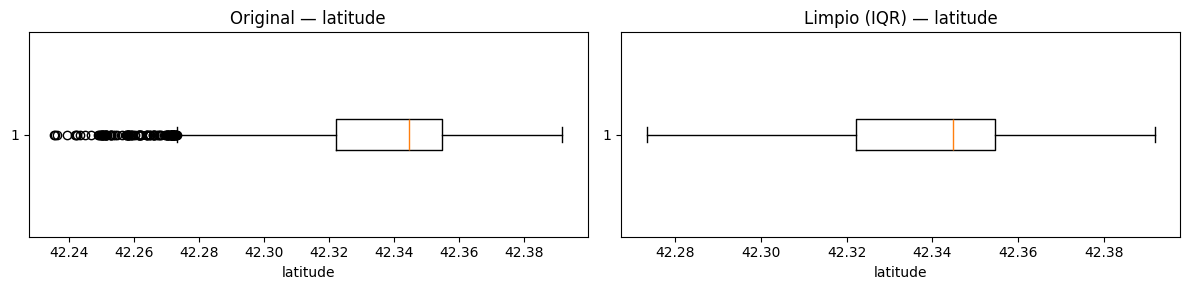

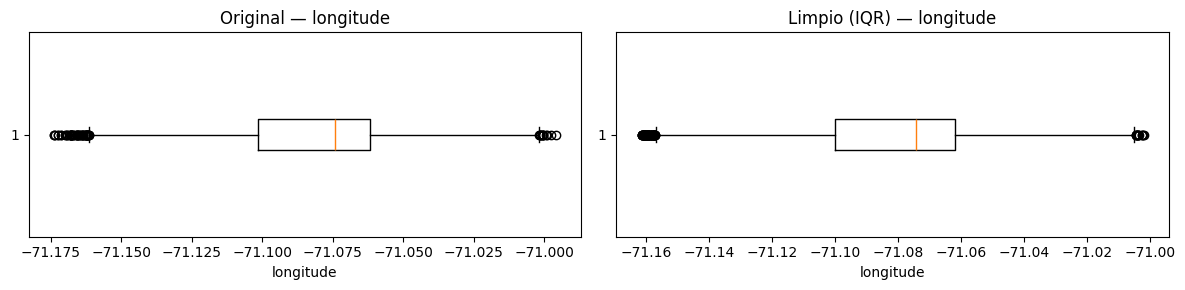

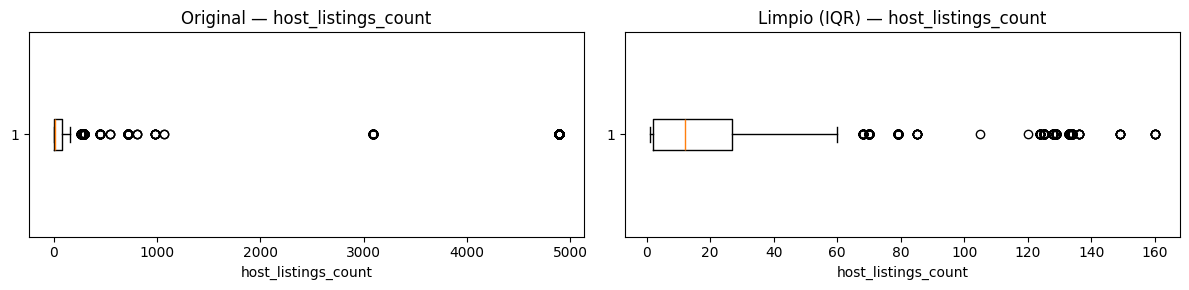

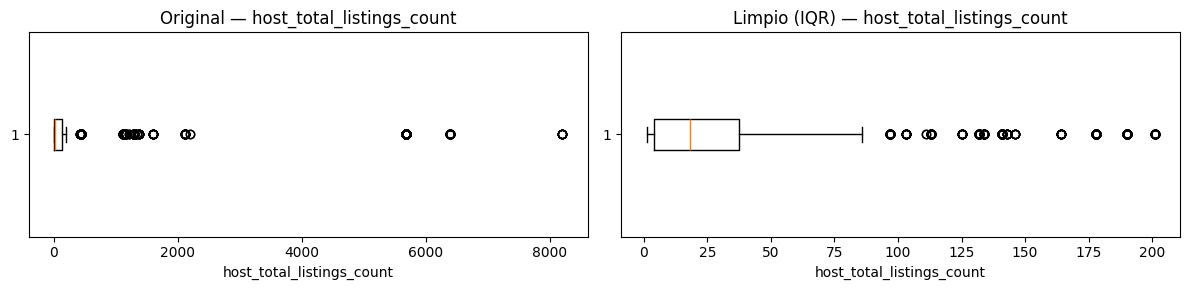

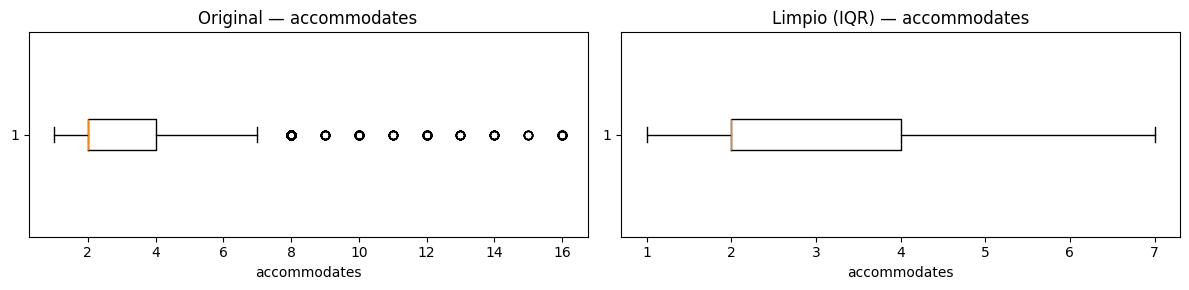

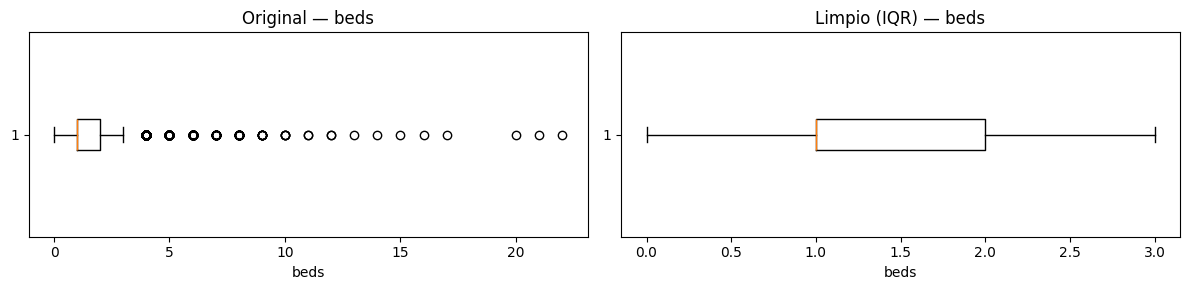

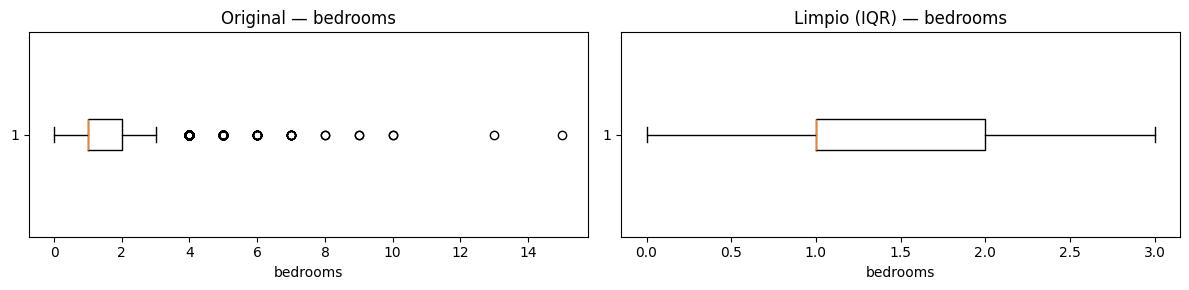

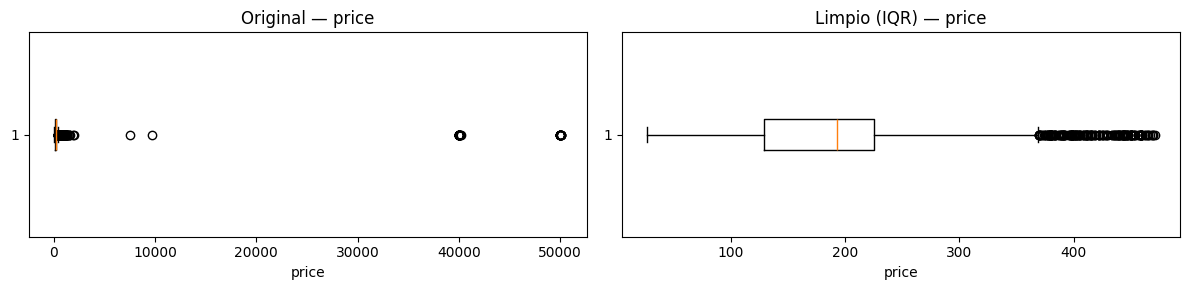

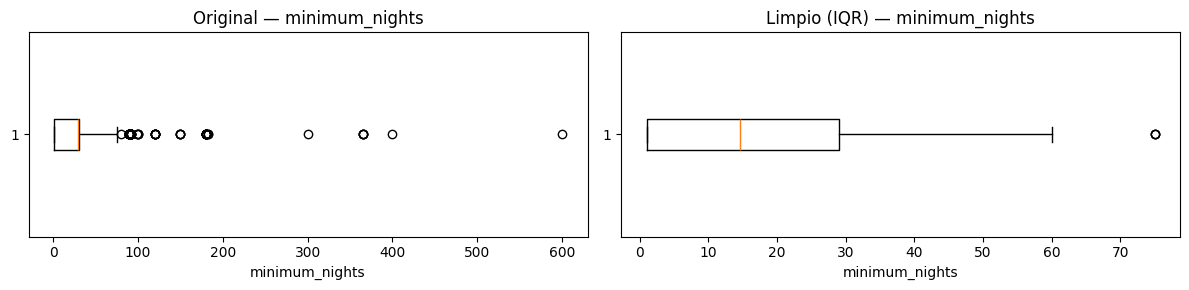

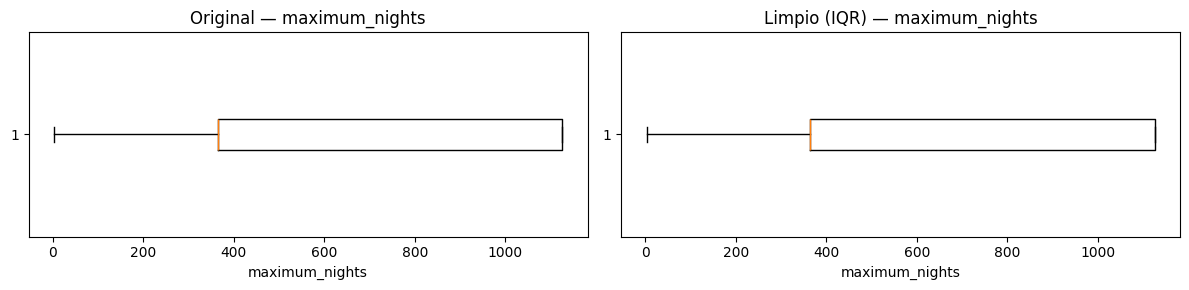

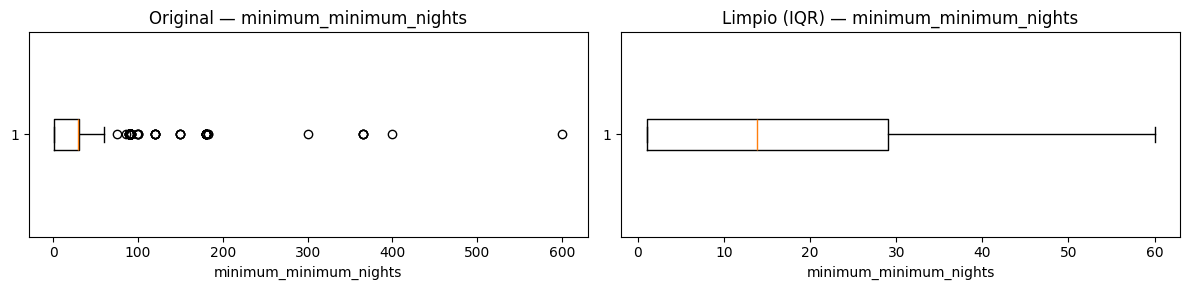

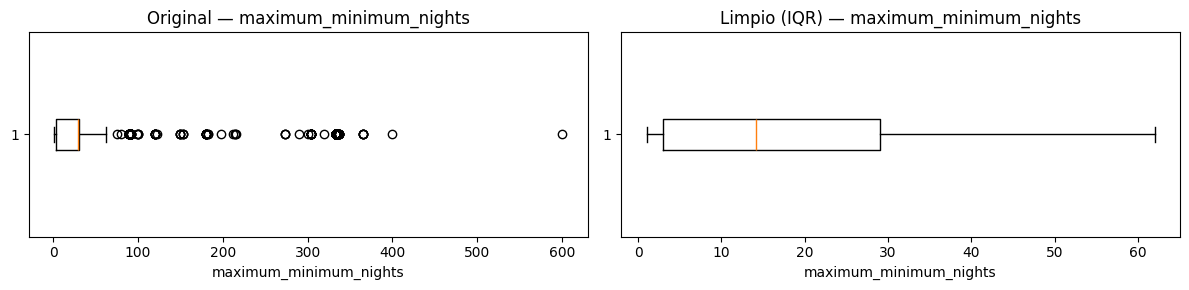

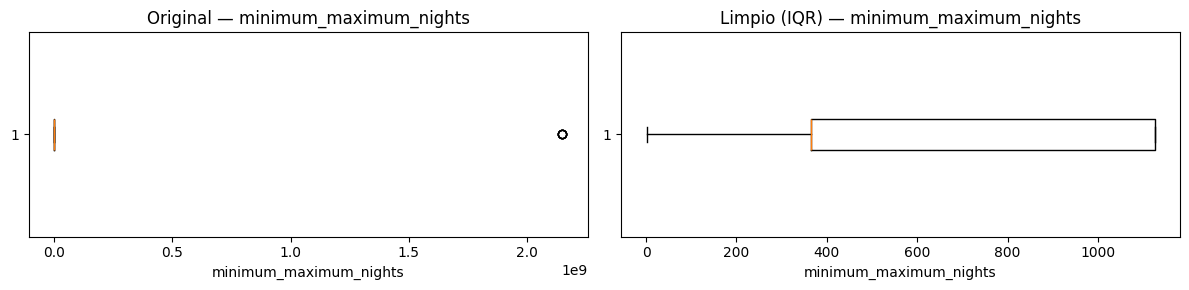

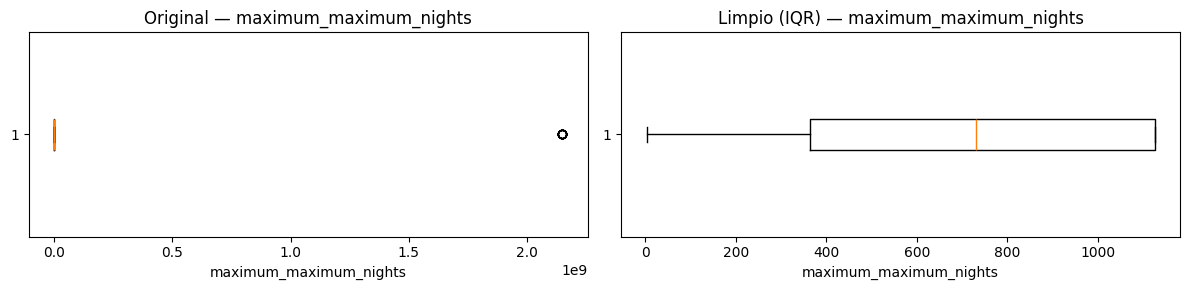

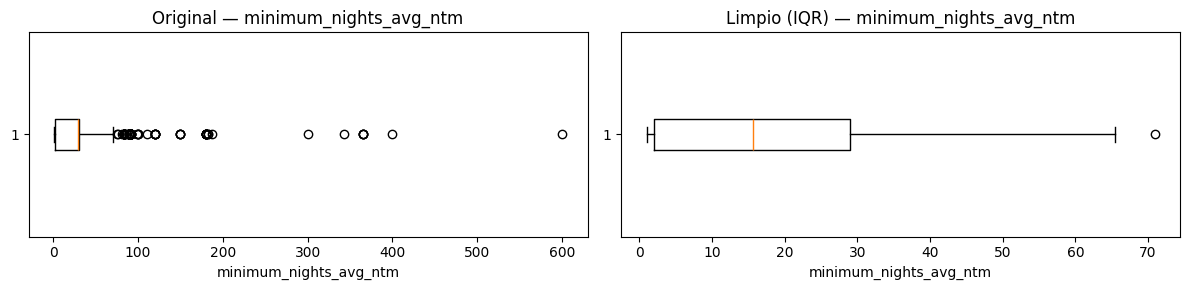

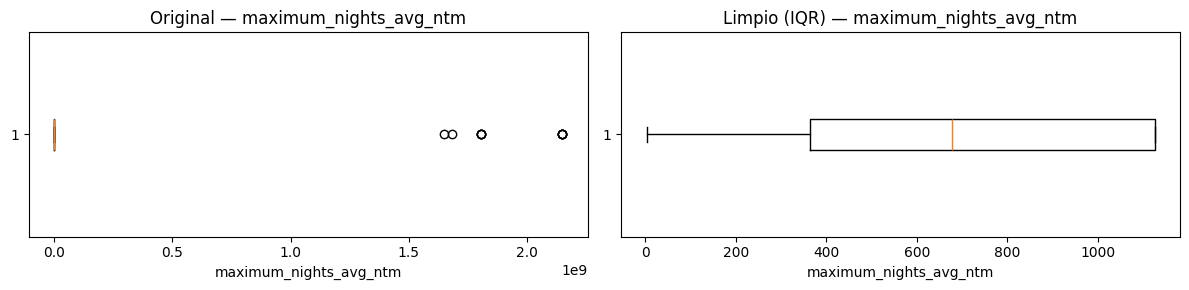

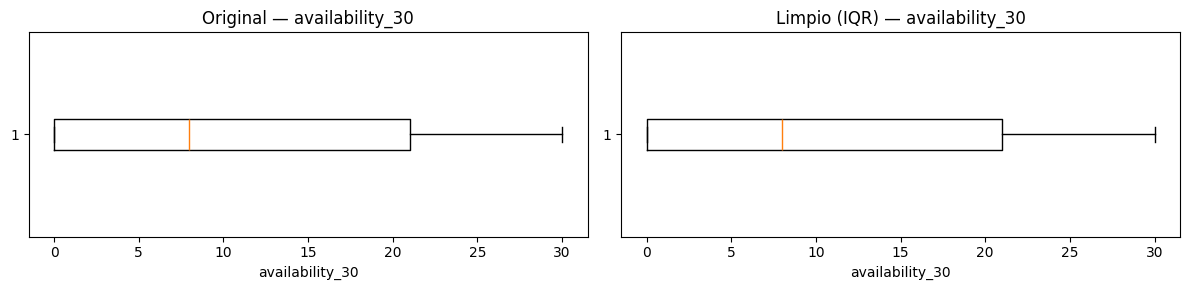

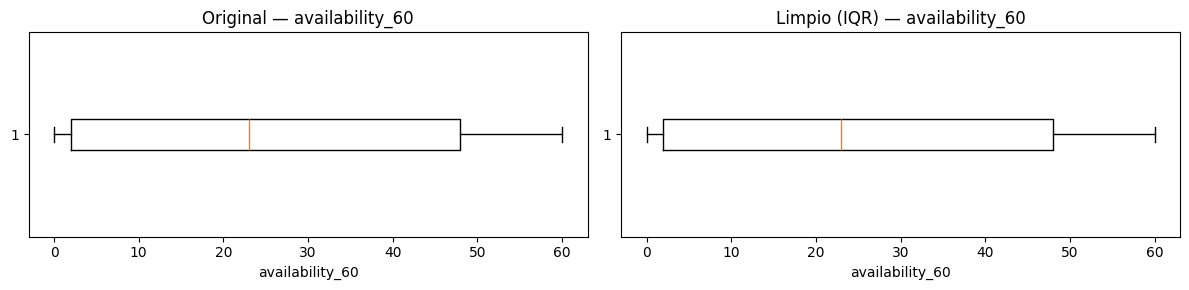

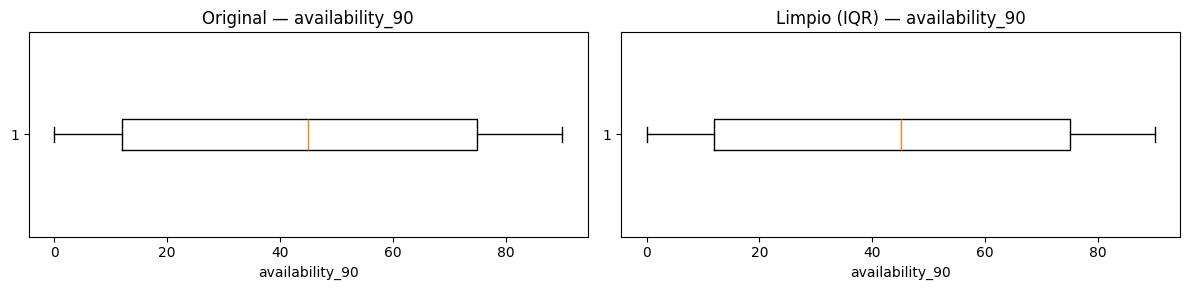

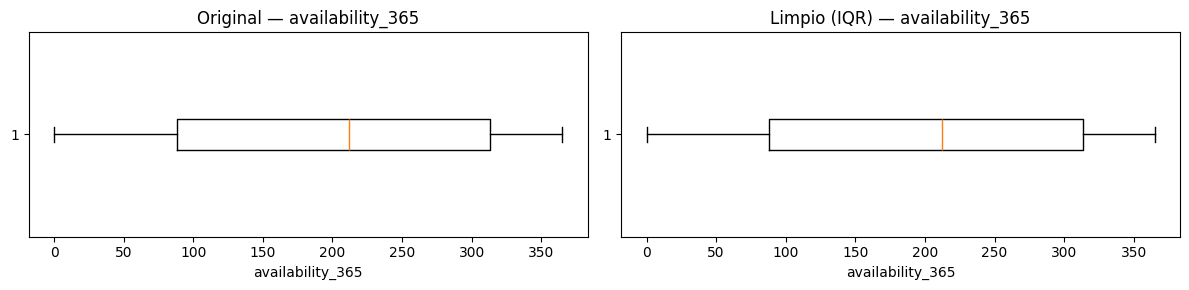

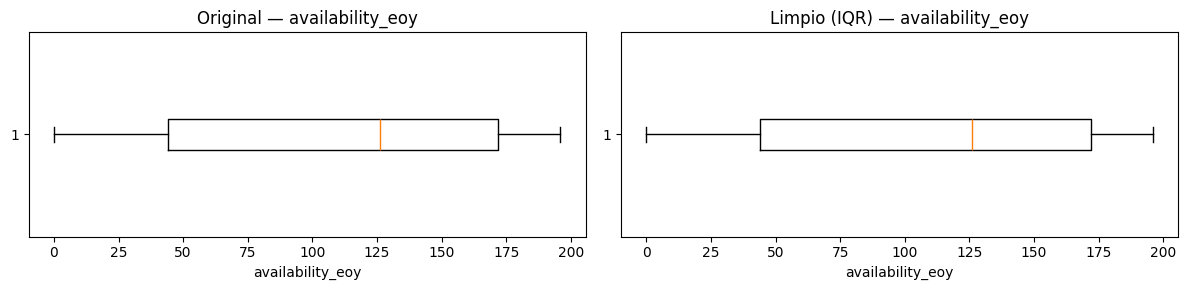

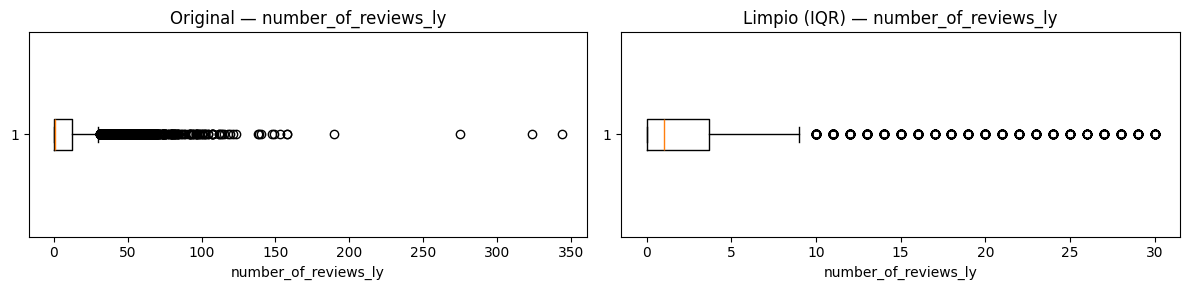

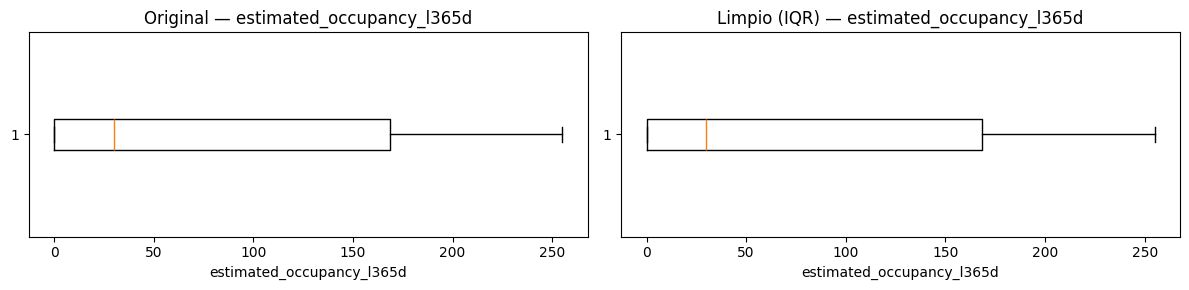

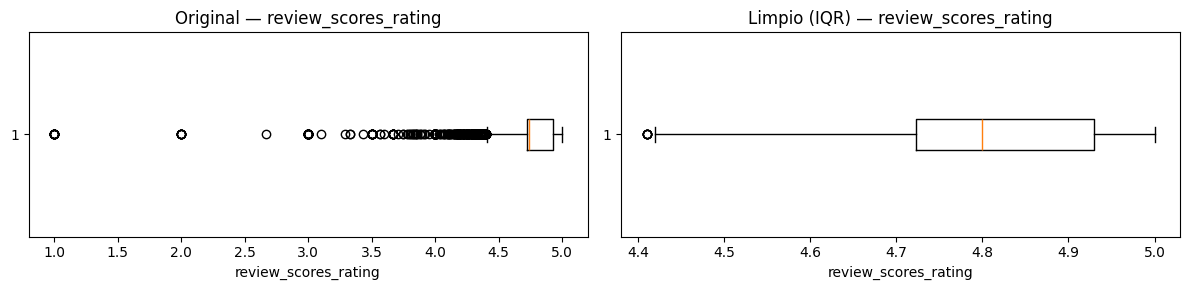

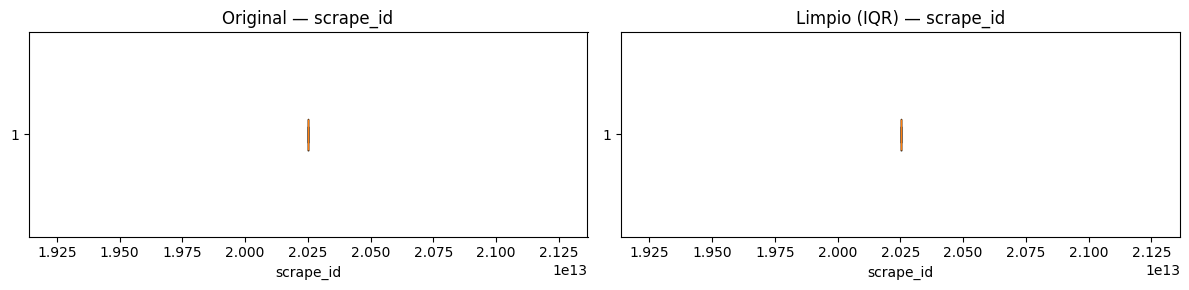

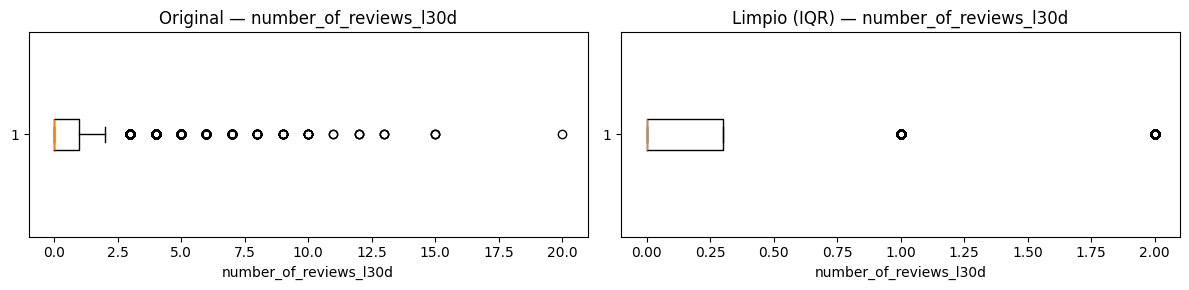

In [19]:
# columnas numéricas presentes en ambos dataframes
cols = [c for c in cuantitativas.columns if c in data4_iqr.columns]

# --- Mostrar en pantalla (uno por columna) ---
for col in cols:
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 2, 1)
    plt.boxplot(cuantitativas[col].dropna(), vert=False)
    plt.title(f"Original — {col}")
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    plt.boxplot(data4_iqr[col].dropna(), vert=False)
    plt.title(f"Limpio (IQR) — {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [20]:
#Rango Intercuartílico (1.5*IQR)
Datos_limpios_iqr = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios_iqr.to_csv("airbnb_sin_outliers_iqr.csv", index=False)